In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# __STUDENTS A__

In [2]:
st_A = pd.read_csv("students_A.csv")
st_A["Height"]/=100
st_A.drop_duplicates(inplace=True)
st_A.head()

,First Name,Last Name,Height,Weight
0,Joseph,Davis,1.77,98
1,Kathleen,Gonzalez,1.66,108
2,Jacob,Castaneda,1.53,59
3,Ashley,Alvarez,1.58,54
4,Michael,Davenport,1.81,70


In [3]:
st_A.shape

(19, 4)

# __STUDENTS B__

In [4]:
st_B = pd.read_csv("students_B.csv")
st_B.head()

,First Name,Last Name,Height (m),Weight (kg)
0,Sean,Atkins,1.71,112.9
1,Taylor,Harris,1.58,83.4
2,Rebecca,Smith,1.57,97.4
3,Catherine,Lopez,1.80,52.2
4,Shelley,Harris,1.56,81.4


In [5]:
st_B.rename(columns={"Height (m)": "Height",
                     "Weight (kg)": "Weight"}, inplace=True)

st_B["Weight"] = st_B["Weight"].astype(int)
st_B.drop_duplicates(inplace=True)
st_B.head()

,First Name,Last Name,Height,Weight
0,Sean,Atkins,1.71,112
1,Taylor,Harris,1.58,83
2,Rebecca,Smith,1.57,97
3,Catherine,Lopez,1.80,52
4,Shelley,Harris,1.56,81


In [6]:
st_B.shape

(17, 4)

# __STUDENTS C__

In [7]:
st_C = pd.read_csv("students_C.csv", delimiter=";")
st_C.head()

,Imie,Nazwisko,Wzrost (cm),Waga (kg)
0,David,Evans,"1,87","101,7"
1,Donna,Brady,"1,77","59,8"
2,Teresa,Bowman,"1,82","105,0"
3,Brianna,Patel,"1,88","51,9"
4,Steven,Cross,"11,870000000000001","86,4"


In [8]:
st_C.rename(columns={"Wzrost (cm)": "Height",
                     "Waga (kg)": "Weight",
                     "Imie":"First Name",
                     "Nazwisko":"Last Name"}, inplace=True)

st_C["Height"] = st_C["Height"].apply(lambda x: x.replace(",", "."))
st_C["Weight"] = st_C["Weight"].apply(lambda x: x.replace(",", "."))

st_C["Height"] = st_C["Height"].astype(float)
st_C["Height"] = st_C["Height"].apply(lambda x: x-10 if x>3 else x)
st_C["Weight"] = st_C["Weight"].astype(float)

st_C["Weight"] = st_C["Weight"].astype(int)
st_C.drop_duplicates(inplace=True)

st_C.head()

,First Name,Last Name,Height,Weight
0,David,Evans,1.87,101
1,Donna,Brady,1.77,59
2,Teresa,Bowman,1.82,105
3,Brianna,Patel,1.88,51
4,Steven,Cross,1.87,86


In [9]:
st_C.shape

(24, 4)

# __RAZEM__

In [10]:
final_df = pd.concat([st_A, st_B, st_C])
final_df.drop_duplicates(inplace=True)
final_df.index = range(final_df.shape[0])

final_df.head()

,First Name,Last Name,Height,Weight
0,Joseph,Davis,1.77,98
1,Kathleen,Gonzalez,1.66,108
2,Jacob,Castaneda,1.53,59
3,Ashley,Alvarez,1.58,54
4,Michael,Davenport,1.81,70


In [11]:
final_df.shape

(57, 4)

In [12]:
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Height,57.0,1.728596,0.105279,1.52,1.66,1.75,1.8,1.9
Weight,57.0,78.894737,22.679195,41.00,58.00,79.00,99.0,119.0


In [13]:
final_df["BMI"] = round(final_df["Weight"] / (final_df["Height"]**2), 2)

final_df.head()

,First Name,Last Name,Height,Weight,BMI
0,Joseph,Davis,1.77,98,31.28
1,Kathleen,Gonzalez,1.66,108,39.19
2,Jacob,Castaneda,1.53,59,25.20
3,Ashley,Alvarez,1.58,54,21.63
4,Michael,Davenport,1.81,70,21.37


In [14]:
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Height,57.0,1.728596,0.105279,1.52,1.66,1.75,1.80,1.90
Weight,57.0,78.894737,22.679195,41.00,58.00,79.00,99.00,119.00
BMI,57.0,26.706316,8.514793,13.09,19.94,25.20,33.25,48.48


In [15]:
bmi_classes = ["underweight", "healthy", "overweight", "obese"]
colors = ["orange", "green", "palegoldenrod", "red"]

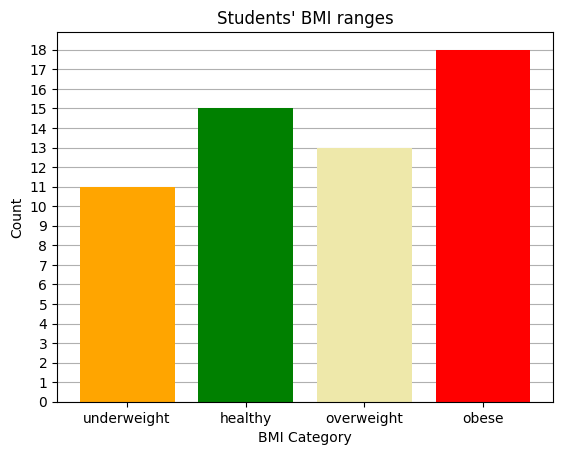

In [16]:
bmi_ranges = final_df.groupby(pd.cut(final_df["BMI"], 
                                     [0, 18.5, 25, 30, 100],
                                     labels=bmi_classes)).size()

plt.grid(visible=True, which="major", axis='y', zorder=1)
plt.bar(bmi_ranges.index, bmi_ranges.values, zorder=2, color=colors)
plt.title("Students' BMI ranges")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.yticks(range(0, bmi_ranges.max()+1, 1))
plt.show()

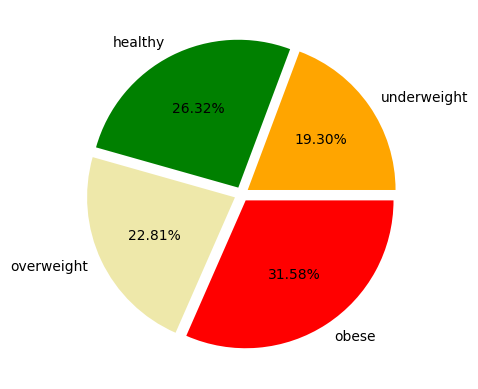

In [17]:
plt.pie(bmi_ranges, labels=bmi_ranges.index, autopct='%1.2f%%', colors=colors, explode=[0.05]*len(bmi_classes))
plt.show()

In [18]:
final_df["BMI_class"] = pd.cut(final_df["BMI"], bins=[0, 18.5, 25, 30, 100], labels=bmi_classes)

In [19]:
bmi_class_to_index = {bmi_class: index for index, bmi_class in enumerate(bmi_classes)}

final_df["BMI_class_label"] = final_df["BMI_class"].apply(lambda x: bmi_class_to_index[x])

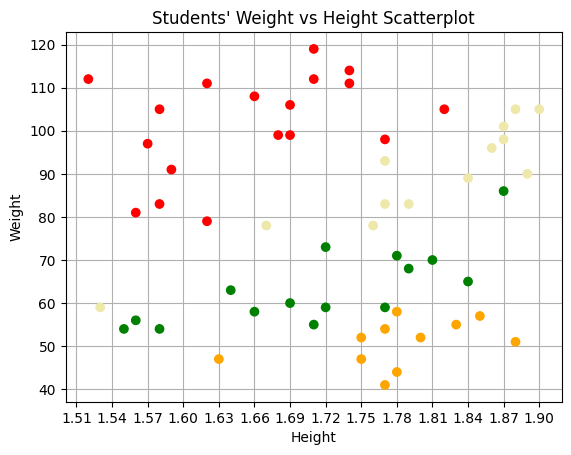

In [20]:
plt.scatter(final_df["Height"], final_df["Weight"], zorder=2, c=final_df["BMI_class_label"], cmap=matplotlib.colors.ListedColormap(colors))
plt.grid(visible=True, zorder=1)
plt.title("Students' Weight vs Height Scatterplot")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.xticks(np.arange(final_df["Height"].min()-0.01, final_df["Height"].max()+0.01, 0.03))
plt.show()

In [21]:
final_df["Weight"].corr(final_df["Height"])

0.004947929017563958

%%EOF